In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [6]:
df_titanic = pd.read_csv(r'C:\Users\niran\OneDrive\Desktop\train.csv')

In [7]:
df_titanic.head(2).T

,0,1
PassengerId,1,2
Survived,0,1
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [8]:
df_titanic.shape[1]

12

In [9]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass'] == Pclass]['Age'].mean())
    else:
        return Age

In [11]:
df_titanic_sub = df_titanic[['Age', 'Pclass']]

In [12]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [13]:
df_titanic['Age'].isna().sum()

0

In [14]:
df_titanic.drop('Cabin', inplace=True, axis=1)

In [15]:
df_titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  22.00000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000   
2                               Heikkinen, Miss. Laina  female  26.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000   
4                             Allen, Mr. William Henry    male  35.00000   
..                                                 ... 

In [16]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
df_titanic['Survived'].sum()

342

<Axes: xlabel='Survived', ylabel='count'>

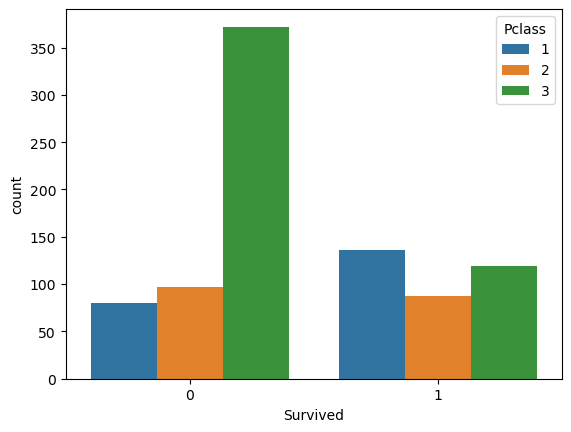

In [42]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_titanic)

In [18]:
df_titanic.groupby(['Survived', 'Pclass']).agg(Total_Count = ('Pclass', 'count')).reset_index()

,Survived,Pclass,Total_Count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
df_titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [21]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [48]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [69]:
df_titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], inplace=True, axis=1)

In [49]:
df_titanic_survived= df_titanic[df_titanic['Survived']==1]

In [50]:
df_titanic['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

(array([ 36.,  19.,  63., 103.,  66.,  24.,  21.,   9.,   0.,   1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

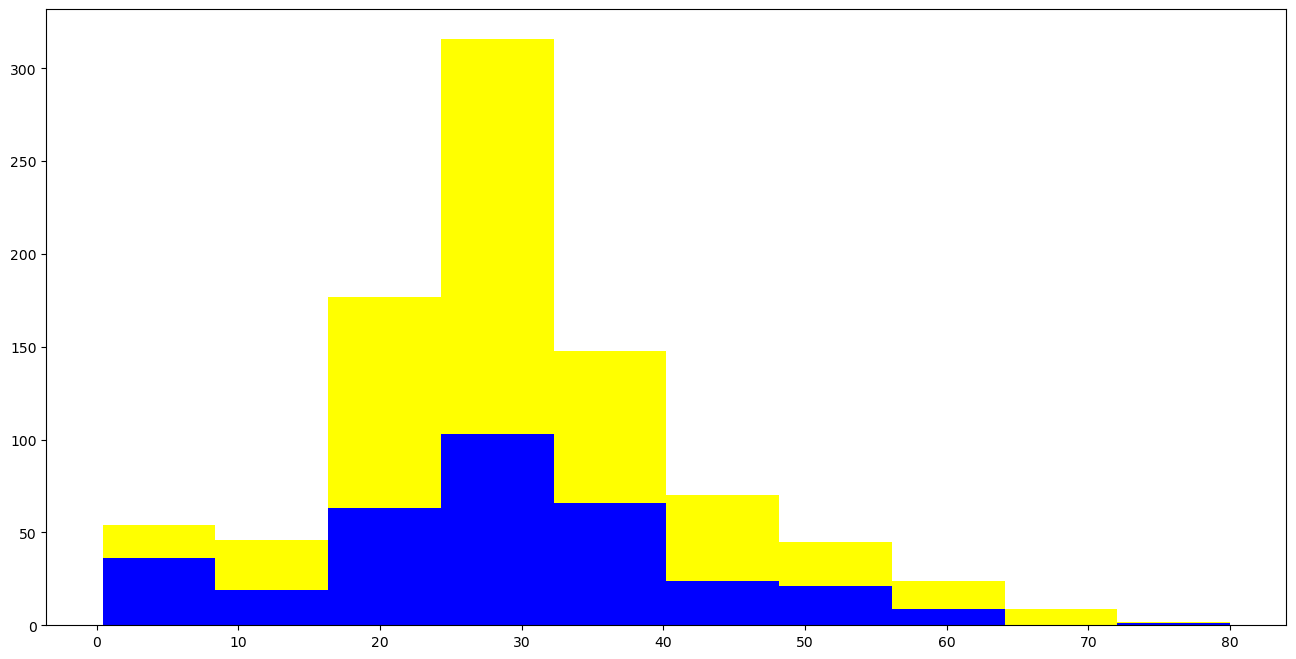

In [51]:
plt.subplots(figsize = (16,8))
plt.hist(df_titanic['Age'], bins = 10, color = 'yellow')
plt.hist(df_titanic_survived['Age'], bins = 10, color = 'blue')

In [52]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix = col_name)
    df = pd.concat([df, dummies], axis=1)
    return df


In [53]:
for col in ['Pclass',  'Sex', 'Embarked']:
    df_titanic = create_encoding(df_titanic, col)
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Sex_female']


In [54]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Pclass_1     891 non-null    uint8  
 12  Pclass_2     891 non-null    uint8  
 13  Pclass_3     891 non-null    uint8  
 14  Sex_female   891 non-null    uint8  
 15  Sex_male     891 non-null    uint8  
 16  Embarked_C   891 non-null    uint8  
 17  Embarked_Q   891 non-null    uint8  
 18  Embarked_S   891 non-null    uint8  
dtypes: float

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(val_y, pred_values)

NameError: name 'val_y' is not defined

In [58]:
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

In [61]:
X = df_titanic[columns]
y = df_titanic['Survived']

In [62]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [63]:
log_reg_model_1 = LogisticRegression()
log_reg_model_1.fit(train_X, train_y)

C:\Users\niran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
pred_values = log_reg_model_1.predict(val_X)

In [65]:
pred_values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [66]:
pred_values.shape

(179,)

In [67]:
acc = accuracy_score(val_y, pred_values)
acc*100

84.35754189944134

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(val_y, pred_values)

In [70]:
cm

array([[103,  14],
       [ 14,  48]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual Values')

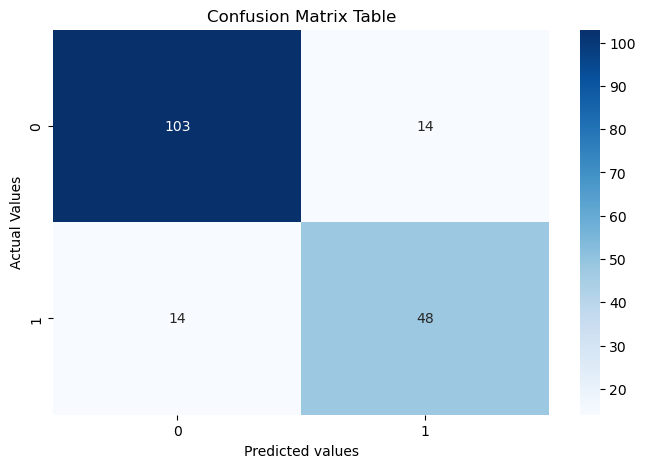

In [71]:
plt.subplots(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix Table', fontsize = 12)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')